In [1]:
import numpy as np
# initialize A matrix
np.random.seed(42)  # for reproducibility
n_nodes = 5
A = np.random.rand(n_nodes, n_nodes)
print(A)

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]]


In [2]:
from nctpy.utils import matrix_normalization
system = 'discrete'
A_norm = matrix_normalization(A=A, c=1, system=system)
print(A_norm)

[[0.11828952 0.30026034 0.23118275 0.18907194 0.04927475]
 [0.04926713 0.01834432 0.27356099 0.18984778 0.22362776]
 [0.00650112 0.30632279 0.26290707 0.06706222 0.05742506]
 [0.05792392 0.09608762 0.16573175 0.13641949 0.09197775]
 [0.19323908 0.04405579 0.09226689 0.11570661 0.14403878]]


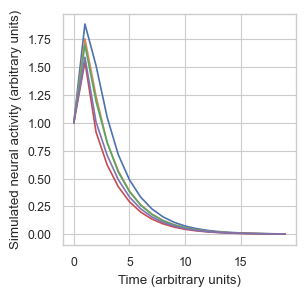

In [3]:
from nctpy.energies import sim_state_eq
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='paper', font_scale=1)

T = 20  # time horizon
U = np.zeros((n_nodes, T))  # the input to the system
U[:, 0] = 1  # impulse, 1 input at the first time point delivered to all nodes
B = np.eye(n_nodes)  # uniform full control set
x0 = np.ones((n_nodes, 1))  # initial state, all nodes set to 1 unit of neural activity
x = sim_state_eq(A_norm=A_norm, B=B, x0=x0, U=U, system=system)

# plot
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(x.T)
ax.set_ylabel('Simulated neural activity (arbitrary units)')
ax.set_xlabel('Time (arbitrary units)')
f.savefig('A_stable.png', dpi=600, bbox_inches='tight', pad_inches=0.01)
plt.show()


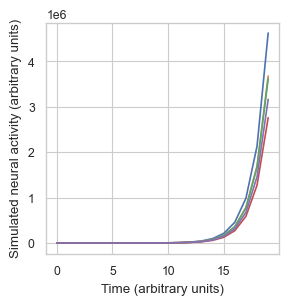

In [4]:
# unstable A
x = sim_state_eq(A_norm=A, B=B, x0=x0, U=U, system=system)

# plot
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(x.T)
ax.set_ylabel('Simulated neural activity (arbitrary units)')
ax.set_xlabel('Time (arbitrary units)')
f.savefig('A_unstable.png', dpi=600, bbox_inches='tight', pad_inches=0.01)
plt.show()

In [5]:
from nctpy.metrics import ave_control
ac = ave_control(A_norm=A_norm, system=system)
print(ac)

[1.28964075 1.18649349 1.18014308 1.10255958 1.13759366]


In [6]:
system = 'continuous'
A_norm = matrix_normalization(A=A, c=1, system=system)
print(A_norm)

[[-0.88171048  0.30026034  0.23118275  0.18907194  0.04927475]
 [ 0.04926713 -0.98165568  0.27356099  0.18984778  0.22362776]
 [ 0.00650112  0.30632279 -0.73709293  0.06706222  0.05742506]
 [ 0.05792392  0.09608762  0.16573175 -0.86358051  0.09197775]
 [ 0.19323908  0.04405579  0.09226689  0.11570661 -0.85596122]]


In [7]:
from nctpy.energies import get_control_inputs, integrate_u

# define initial and target states as random patterns of activity
np.random.seed(42)  # for reproducibility
x0 = np.random.rand(n_nodes, 1)  # initial state
xf = np.random.rand(n_nodes, 1)  # target state

# set parameters
T = 1  # time horizon
rho = 1  # mixing parameter for state trajectory constraint
S = np.eye(n_nodes)  # nodes in state trajectory to be constrained

# get the state trajectory (x) and the control inputs (u)
x, u, n_err = get_control_inputs(A_norm=A_norm, T=T, B=B, x0=x0, xf=xf, system=system, rho=rho, S=S)

# print errors
thr = 1e-8

# the first numerical error corresponds to the inversion error
print('inversion error = {:.2E} (<{:.2E}={:})'
      .format(n_err[0], thr, n_err[0] < thr))

# the second numerical error corresponds to the reconstruction error
print('reconstruction error = {:.2E} (<{:.2E}={:})'
      .format(n_err[1], thr, n_err[1] < thr))

inversion error = 1.31E-16 (<1.00E-08=True)
reconstruction error = 5.45E-14 (<1.00E-08=True)


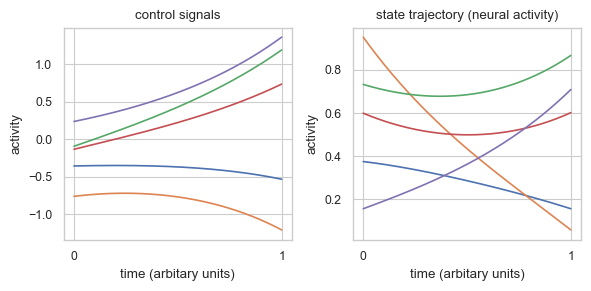

In [8]:
# plot x and u
f, ax = plt.subplots(1, 2, figsize=(6, 3))
# plot control signals for initial state
ax[0].plot(u)
ax[0].set_title('control signals')

# plot state trajectory for initial state
ax[1].plot(x)
ax[1].set_title('state trajectory (neural activity)')

for cax in ax.reshape(-1):
    cax.set_ylabel("activity")
    cax.set_xlabel("time (arbitary units)")
    cax.set_xticks([0, x.shape[0]])
    cax.set_xticklabels([0, T])

f.tight_layout()
f.savefig('plot_xu.png', dpi=600, bbox_inches='tight', pad_inches=0.01)
plt.show()

In [9]:
# integrate control inputs to get control energy
node_energy = integrate_u(u)
print('node energy =', node_energy)

# summarize nodal energy to get control energy
energy = np.sum(node_energy)
print('energy = {:.2F}'.format(np.round(energy, 2)))


node energy = [159.35334645 728.32771143 349.67802113 120.56428349 563.2983561 ]
energy = 1921.22
